In [21]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [15]:
df_c19 = pd.read_csv('covid_19_data.csv')
df_c19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [16]:
df_c19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7926 entries, 0 to 7925
Data columns (total 8 columns):
SNo                7926 non-null int64
ObservationDate    7926 non-null object
Province/State     4493 non-null object
Country/Region     7926 non-null object
Last Update        7926 non-null object
Confirmed          7926 non-null float64
Deaths             7926 non-null float64
Recovered          7926 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 495.5+ KB


### Summary stats

In [17]:
# what is the date range?
print("Start: ", df_c19['ObservationDate'].min(), '\n',
     "End: ", df_c19['ObservationDate'].max())

Start:  01/22/2020 
 End:  03/22/2020


In [18]:
# How do the number of entries increase each day?
obs_per_day = pd.DataFrame(df_c19.groupby(['ObservationDate']).count()['SNo'])
obs_perc_change = pd.DataFrame(obs_per_day.pct_change())


[[]]

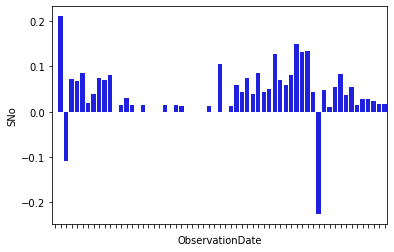

In [19]:
ax = sns.barplot(x = obs_perc_change.index, y = obs_perc_change.SNo,
                color = "blue")
ax.set(xticklabels=[])

In [20]:
def groupby_obsDate_country(df):
    
    '''
    Create a dataframe with the number of each case per day, per country
    '''
    
    country_obs_counts = pd.DataFrame(df.groupby(['ObservationDate', 'Country/Region']).count()['SNo']).reset_index()
    country_obs_counts.rename(columns={'SNo': 'Count'}, inplace = True)

    return country_obs_counts

groupby_obsDate_country(df_c19)

,ObservationDate,Country/Region,Count
0,01/22/2020,Hong Kong,1
1,01/22/2020,Japan,1
2,01/22/2020,Macau,1
3,01/22/2020,Mainland China,31
4,01/22/2020,South Korea,1
...,...,...,...
3934,03/22/2020,Uzbekistan,1
3935,03/22/2020,Venezuela,1
3936,03/22/2020,Vietnam,1
3937,03/22/2020,Zambia,1


In [142]:
# When did COVID-19 first appear in Australia?
def first_aus_case(df):
    first_aus = df[(df['Country/Region'] == 'Australia') & (df['Confirmed'] >= 1.0)]
    first_aus = first_aus.sort_values('ObservationDate').head(1)
    
    return first_aus
    
first_aus_case(df_c19)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
166,167,01/25/2020,NaN,Australia,1/25/20 17:00,4.0,0.0,0.0


In [163]:
# How long did it take from first case to first death in Mainland China?

def first_china_death(df, measure):
    first = df[(df['Country/Region'] == "Mainland China") & 
       measure >= 1.0].head(1)['ObservationDate']
    return first


print(first_china_death(df_c19, df_c19['Confirmed']))
print(first_china_death(df_c19, df_c19['Deaths']))

0    01/22/2020
Name: ObservationDate, dtype: object
13    01/22/2020
Name: ObservationDate, dtype: object


In [175]:
# How does the count of cases increase in each Chinese province over time?

chinese_cases = df_c19[(df_c19['Country/Region'] == "Mainland China") & 
      (df_c19['Confirmed'] >= 1.0)]



In [181]:
chinese_cases[['ObservationDate','Province/State','Confirmed', 'Deaths','Recovered']]

#[['Province/State']]

,ObservationDate,Province/State,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,1.0,0.0,0.0
1,01/22/2020,Beijing,14.0,0.0,0.0
2,01/22/2020,Chongqing,6.0,0.0,0.0
3,01/22/2020,Fujian,1.0,0.0,0.0
5,01/22/2020,Guangdong,26.0,0.0,0.0
...,...,...,...,...,...
5712,03/15/2020,Xinjiang,76.0,3.0,73.0
5713,03/15/2020,Inner Mongolia,75.0,1.0,71.0
5714,03/15/2020,Ningxia,75.0,0.0,73.0
5773,03/15/2020,Qinghai,18.0,0.0,18.0


In [198]:
chinese_cases_byProvince =  chinese_cases.groupby(['ObservationDate', 'Province/State']).sum()[['Confirmed']].reset_index()

,ObservationDate,Province/State,Confirmed
10,01/22/2020,Hubei,444.0
35,01/23/2020,Hubei,444.0
63,01/24/2020,Hubei,549.0
92,01/25/2020,Hubei,761.0
122,01/26/2020,Hubei,1058.0
152,01/27/2020,Hubei,1423.0
182,01/28/2020,Hubei,3554.0
212,01/29/2020,Hubei,3554.0
242,01/30/2020,Hubei,4903.0
273,01/31/2020,Hubei,5806.0


In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv')
data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,NaN,NaN
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
8,Hainan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN
9,Hebei,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
